In [195]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Diamonds Dataset
#### Source : https://www.kaggle.com/shivam2503/diamonds

In [196]:
data = pd.read_csv('./diamonds.csv', index_col=0)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Nrs of observations and columns check

In [197]:
data.shape

(53940, 10)

In [198]:
# data = data.sample(frac=0.2)

### Features format check

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


### Checking NULL values

In [200]:
data.reset_index(inplace=True, drop=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Finding correlations between features 

In [201]:
correlation = data.corr()

correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


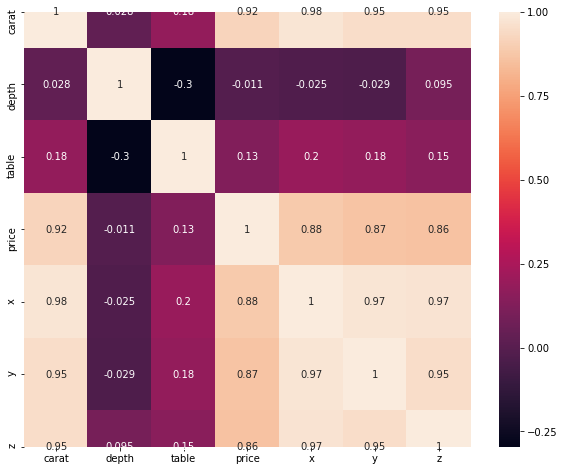

In [202]:
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)

plt.show()

### Find unique values

In [203]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [204]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [205]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### Count values and plot the graph

In [206]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

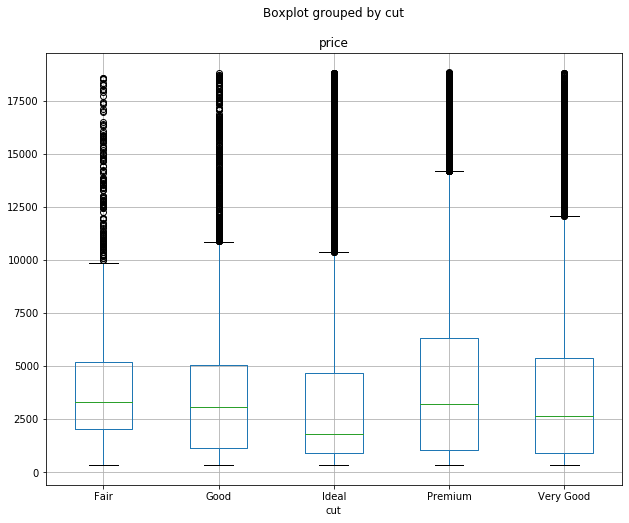

In [207]:
data.boxplot(by ='cut', column =['price'], grid = True, figsize=(10, 8)) 

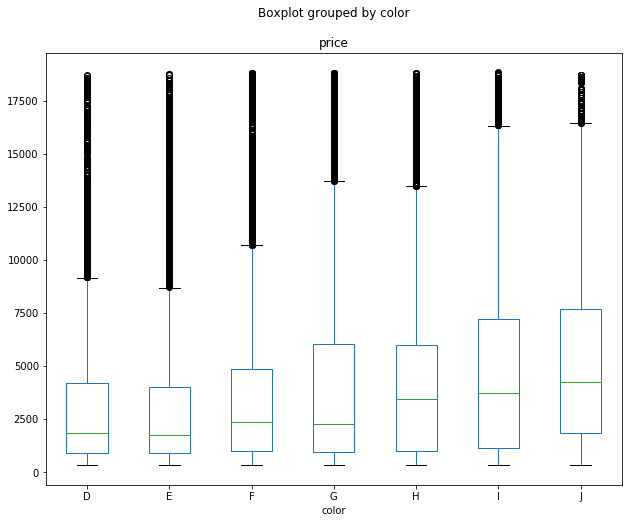

In [208]:
data.boxplot(by ='color', column =['price'], grid = False, figsize=(10, 8)) 

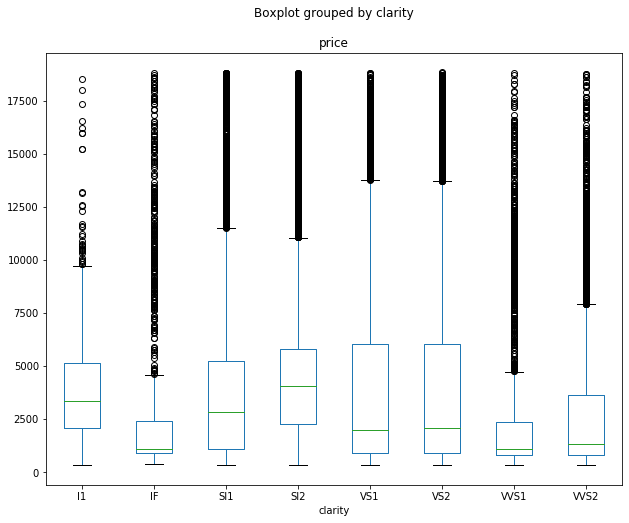

In [209]:
data.boxplot(by ='clarity', column =['price'], grid = False, figsize=(10, 8)) 

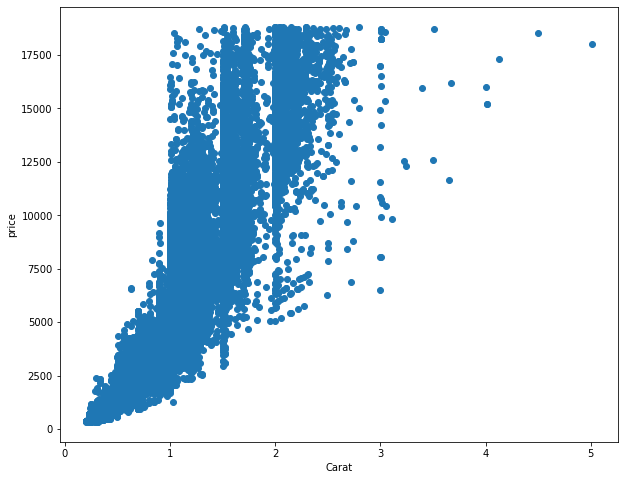

In [210]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['carat'], data['price'])

plt.xlabel("Carat")
plt.ylabel("price")

plt.show()

### Converting categorical into numerical
using label encoder and one hot encoder

In [211]:
clarity_dict = {"IF" : 7, "VVS1" : 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" :  2, "SI2" : 1, "I1" : 0}

data['clarity'].replace(clarity_dict, inplace=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75


In [212]:
data = pd.get_dummies(data, columns=['cut', 'color'])

data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1


In [213]:
NUMERIC_FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z']

numeric_df = data[NUMERIC_FEATURES]

numeric_df.describe()

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [214]:
from sklearn.preprocessing import scale

numeric_array = scale(numeric_df)


In [215]:
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)

numeric_df.describe()

,carat,depth,table,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.889982e-14,-3.658830e-15,1.274832e-14,1.034809e-14,-3.139766e-15,-7.314273e-15
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-1.308760e+01,-6.470073e+00,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-8.395232e-01,-5.231053e-01,-6.521385e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-2.066210e-01,3.531678e-02,-2.046051e-01,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,5.106683e-01,5.239361e-01,6.904618e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075e+00,1.204139e+01,1.680167e+01,4.465203e+00,4.654965e+01,4.004758e+01


In [216]:
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1


In [217]:
data.drop(NUMERIC_FEATURES, inplace=True, axis=1)

data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1,326,0,0,1,0,0,0,1,0,0,0,0,0
1,2,326,0,0,0,1,0,0,1,0,0,0,0,0
2,4,327,0,1,0,0,0,0,1,0,0,0,0,0
3,3,334,0,0,0,1,0,0,0,0,0,0,1,0
4,1,335,0,1,0,0,0,0,0,0,0,0,0,1


In [218]:
numeric_df.head()

,carat,depth,table,x,y,z
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [219]:
data.shape, numeric_df.shape

((53940, 14), (53940, 6))

In [220]:
data = pd.concat([data, numeric_df], axis=1)

data.shape

(53940, 20)

In [221]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,1,326,0,0,1,0,0,0,1,0,0,0,0,0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,2,326,0,0,0,1,0,0,1,0,0,0,0,0,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,4,327,0,1,0,0,0,0,1,0,0,0,0,0,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,3,334,0,0,0,1,0,0,0,0,0,0,1,0,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,1,335,0,1,0,0,0,0,0,0,0,0,0,1,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [222]:
data.to_csv('datasets/diamonds_processed.csv', index=False)

In [223]:
!dir datasets

 Volume in drive C has no label.
 Volume Serial Number is A8B3-65A6

 Directory of C:\Users\u721272\Desktop\python\Janini Ravi\creating-machine-learning-models\datasets

04/27/2020  04:57 PM    <DIR>          .
04/27/2020  04:57 PM    <DIR>          ..
08/25/2019  10:40 PM         5,057,493 bbc-text.csv
08/25/2019  10:40 PM            18,846 boston_data.csv
08/25/2019  10:40 PM             8,724 cars.csv
08/25/2019  10:40 PM         3,192,560 diamonds.csv
05/12/2020  05:33 PM         8,080,232 diamonds_processed.csv
04/27/2020  06:39 PM         2,420,224 diamonds_processed.xls
08/25/2019  10:40 PM           747,025 gender_voice_dataset.csv
08/25/2019  10:40 PM            91,065 german_credit_data_dataset.csv
08/25/2019  10:40 PM             3,981 Mall_Customers.csv
08/25/2019  10:40 PM            10,782 wine.csv
08/25/2019  10:40 PM             6,148 _DS_Store
              11 File(s)     19,637,080 bytes
               2 Dir(s)  392,243,544,064 bytes free


### Spliting into train and test data

In [224]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [225]:
x_train.shape, y_train.shape

((43152, 19), (43152,))

In [226]:
x_test.shape, y_test.shape

((10788, 19), (10788,))

### Linear regression


In [227]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [228]:
y_prediction = linear_regression.predict(x_test)

y_prediction

array([5192.70093405, 7360.37416323, 5987.40487298, ..., 5571.1626533 ,
       7368.89858148, 2343.51625881])

### Find train and test score 

In [229]:
train_score = linear_regression.score(x_train, y_train)

print("Training score : ", train_score)

Training score :  0.9099057566776174


In [230]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_prediction)

print("Testing score : ", score)

Testing score :  0.912612112963329
